In [92]:
import pandas as pd

In [93]:
# read from json file
df = pd.read_json('dota.json')

df.head()

,id,name,localized_name,primary_attr,attack_type,roles,img,icon,base_health,base_health_regen,...,6_win,7_pick,7_win,8_pick,8_win,null_pick,null_win,winrate,lane,main_role
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,"[Carry, Escape, Nuker]",/apps/dota2/images/heroes/antimage_full.png?,/apps/dota2/images/heroes/antimage_icon.png,200,0.25,...,8610,7417,3591,1796,819,2386741,0,47.867144,1,safelane
1,2,npc_dota_hero_axe,Axe,str,Melee,"[Initiator, Durable, Disabler, Jungler]",/apps/dota2/images/heroes/axe_full.png?,/apps/dota2/images/heroes/axe_icon.png,200,2.75,...,5964,4676,2272,951,469,1927988,0,48.711569,3,offlane
2,3,npc_dota_hero_bane,Bane,int,Ranged,"[Support, Disabler, Nuker, Durable]",/apps/dota2/images/heroes/bane_full.png?,/apps/dota2/images/heroes/bane_icon.png,200,NaN,...,2044,1962,1030,750,399,507261,0,52.691740,5,hard_support
3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,"[Carry, Disabler, Jungler, Nuker, Initiator]",/apps/dota2/images/heroes/bloodseeker_full.png?,/apps/dota2/images/heroes/bloodseeker_icon.png,200,NaN,...,2828,2479,1219,855,428,878740,0,49.400120,1,safelane
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,"[Support, Disabler, Nuker, Jungler]",/apps/dota2/images/heroes/crystal_maiden_full....,/apps/dota2/images/heroes/crystal_maiden_icon.png,200,NaN,...,9025,7684,3865,2386,1156,2259888,0,49.860973,5,hard_support


In [94]:
features = ['base_health', 'base_health_regen', 'base_mana', 'base_mana_regen', 'base_armor', 
            'base_mr', 'base_attack_min', 'base_attack_max', 'base_str', 'base_agi', 'base_int', 'str_gain',
            'agi_gain', 'int_gain', 'attack_range', 'projectile_speed', 'attack_rate', 'move_speed', 'turn_rate'
            ]

# drop rows with missing values
df = df.dropna()

# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

print(df[features].head())



   base_health  base_health_regen  base_mana  base_mana_regen  base_armor  \
0          0.0          -0.867491        0.0        -0.253766   -0.960799   
1          0.0           2.186077        0.0        -0.253766   -0.960799   
5          0.0          -0.867491        0.0        -0.253766   -0.356868   
6          0.0           0.048579        0.0        -0.253766    0.850993   
7          0.0          -0.562134        0.0        -0.253766   -0.356868   

   base_mr  base_attack_min  base_attack_max  base_str  base_agi  base_int  \
0      0.0         0.172828        -0.199330  0.473537  0.906663 -1.851603   
1      0.0        -0.150765        -0.486889  1.095495  0.128260  0.127438   
5      0.0         0.172828         0.232008 -1.081360  0.128260 -0.862083   
6      0.0        -0.150765         0.375787  0.162557 -1.428546 -0.532242   
7      0.0        -1.930525        -2.068462 -0.459401  2.852670 -1.191923   

   str_gain  agi_gain  int_gain  attack_range  projectile_speed  att

In [95]:
# import kmeans and vq
from scipy.cluster.vq import kmeans, vq

# kmeans
k = 5
centroids, _ = kmeans(df[features], k)

In [96]:
df['cluster_labels'], _ = vq(df[features], centroids)

# print cluster centers of each feature
print(df.groupby('cluster_labels')[features].mean())

                base_health  base_health_regen  base_mana  base_mana_regen  \
cluster_labels                                                               
0                       0.0          -0.714813        0.0        -0.253766   
1                       0.0          -0.073563        0.0         0.826786   
2                       0.0          -0.752982        0.0         0.016372   
3                       0.0          -0.034700        0.0         0.073674   
4                       0.0           0.455722        0.0        -0.253766   

                base_armor  base_mr  base_attack_min  base_attack_max  \
cluster_labels                                                          
0                -0.658834      0.0        -0.878849        -1.133896   
1                -0.840013      0.0        -0.247843         0.145740   
2                -0.658834      0.0        -1.000196        -0.954172   
3                 0.631382      0.0         0.128702         0.022874   
4              

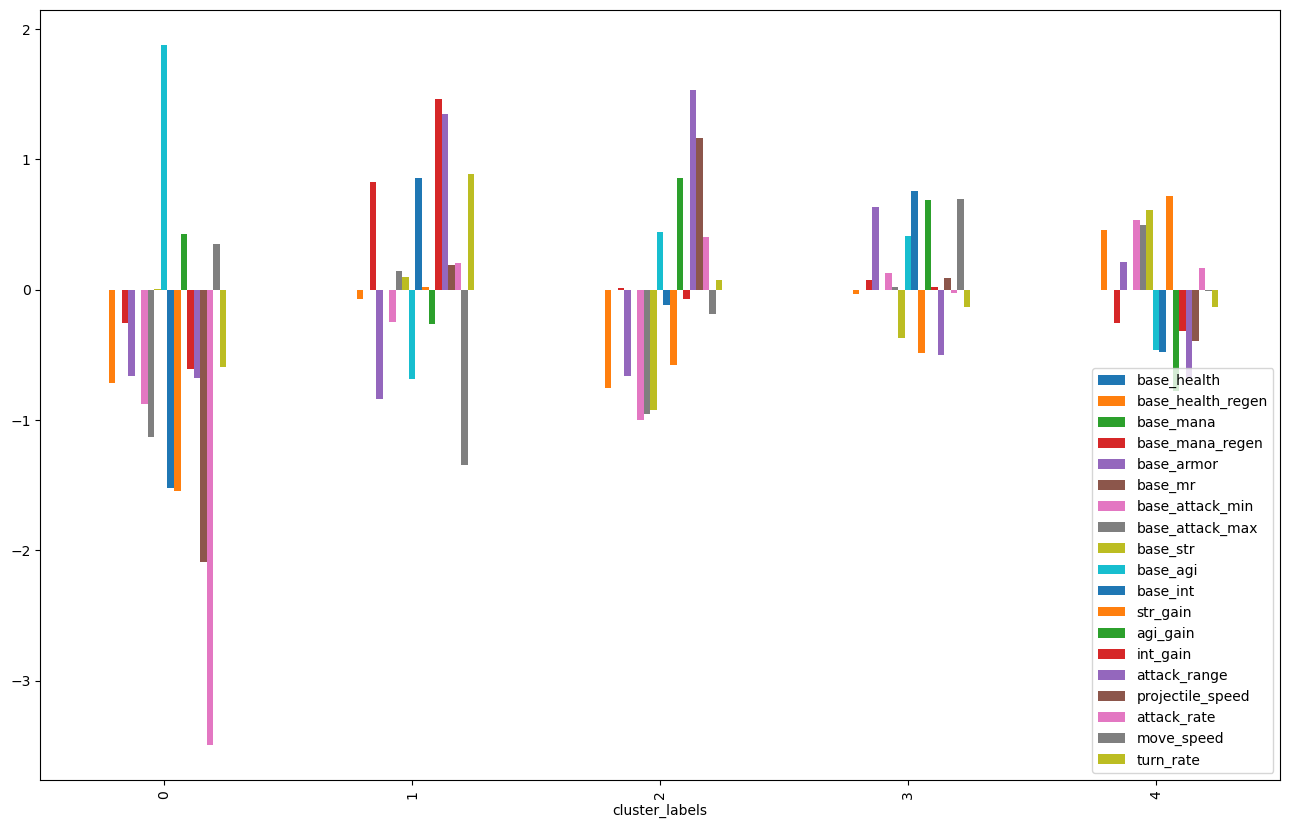

In [97]:
from matplotlib import pyplot as plt

# plot cluster centers of each feature
df.groupby('cluster_labels')[features].mean().plot(legend=True, kind='bar', figsize=(16, 10))
plt.show()

In [98]:
# get the name column of the heroes
for cluster in df['cluster_labels'].unique():
    print(f'Cluster {cluster}:')
    print(df[df['cluster_labels'] == cluster]['localized_name'].values)
    print('\n')
    


Cluster 0:
['Anti-Mage' 'Juggernaut']


Cluster 4:
['Axe' 'Earthshaker' 'Pudge' 'Tiny' 'Kunkka' 'Slardar' 'Riki'
 'Faceless Void' 'Night Stalker' 'Spectre' 'Ursa' 'Spirit Breaker'
 'Brewmaster' 'Ogre Magi' 'Slark' 'Magnus' 'Tusk' 'Abaddon']


Cluster 2:
['Drow Ranger' 'Shadow Fiend' 'Razor' 'Vengeful Spirit' 'Clinkz'
 'Lone Druid' 'Troll Warlord' 'Hoodwink']


Cluster 3:
['Phantom Lancer' 'Phantom Assassin' 'Templar Assassin' 'Luna'
 'Bounty Hunter' 'Meepo' 'Nyx Assassin' 'Naga Siren' 'Ember Spirit'
 'Monkey King' 'Pangolier']


Cluster 1:
['Puck' 'Weaver' 'Batrider' 'Phoenix' 'Arc Warden']




In [99]:
# get the name column of the heroes
for cluster in df['cluster_labels'].unique():
    print(f'Cluster {cluster}:')
    print(df[df['cluster_labels'] == cluster]['primary_attr'].values)
    print('\n')



Cluster 0:
['agi' 'agi']


Cluster 4:
['str' 'str' 'str' 'str' 'str' 'str' 'agi' 'agi' 'str' 'agi' 'agi' 'str'
 'str' 'int' 'agi' 'str' 'str' 'str']


Cluster 2:
['agi' 'agi' 'agi' 'agi' 'agi' 'agi' 'agi' 'agi']


Cluster 3:
['agi' 'agi' 'agi' 'agi' 'agi' 'agi' 'agi' 'agi' 'agi' 'agi' 'agi']


Cluster 1:
['int' 'agi' 'int' 'str' 'agi']




In [100]:
# get the name column of the heroes
for cluster in df['cluster_labels'].unique():
    print(f'Cluster {cluster}:')
    print(df[df['cluster_labels'] == cluster]['attack_type'].values)
    print('\n')

Cluster 0:
['Melee' 'Melee']


Cluster 4:
['Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee'
 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee']


Cluster 2:
['Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged']


Cluster 3:
['Melee' 'Melee' 'Ranged' 'Ranged' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee'
 'Melee' 'Melee']


Cluster 1:
['Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged']




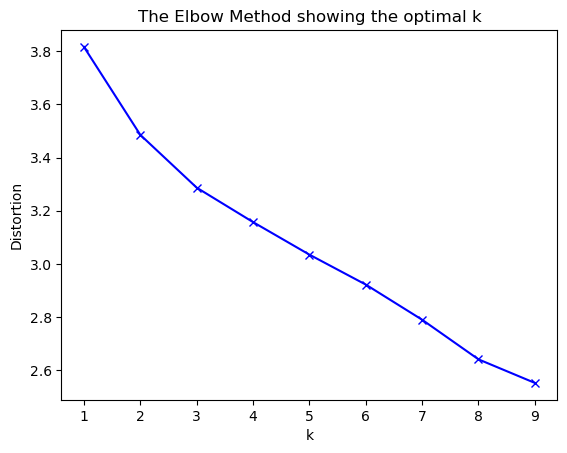

In [101]:
# perform elbow method to find optimal k
from scipy.spatial.distance import cdist

distortions = []
K = range(1, 10)
for k in K:
    centroids, distortion = kmeans(df[features], k)
    distortions.append(distortion)

# plot elbow method
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
